In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Sydney_Data.csv')

In [3]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

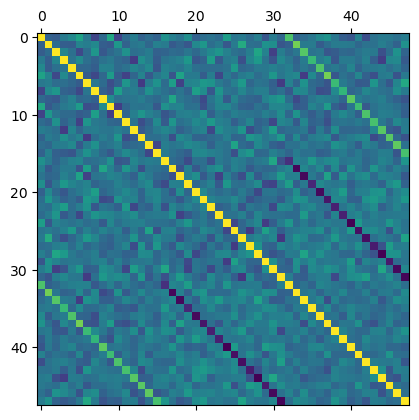

In [4]:
plt.matshow(X.corr())

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [7]:
model.fit(X_train, y_train)
pd.DataFrame(model.coef_, X.columns, columns=['Coef'])

,Coef
127.9439,-0.000673
264.9656,-0.003676
68.3481,-0.001479
521.757,-0.000437
443.6997,-0.002000
195.9648,0.000929
166.7701,-0.000799
504.285,0.000973
104.0226,-0.001439
205.2257,-0.000404


In [8]:
predictions = model.predict(X_test)
model.score(X_test, y_test)

0.9999999974729452

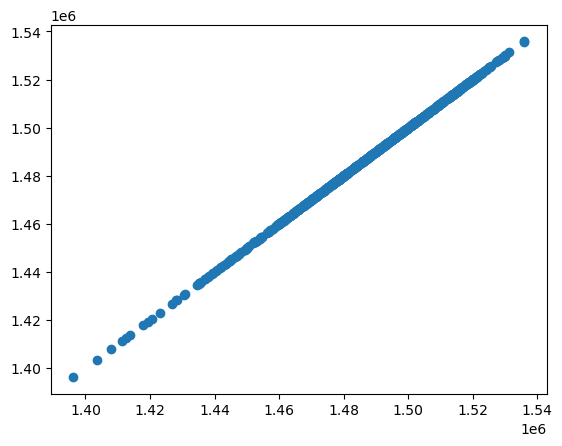

In [9]:
plt.scatter(y_test, predictions)

(array([ 12.,  10.,  21.,  50., 136., 224., 153.,  72.,  37.,   5.]),
 array([-4.24644446, -3.51605948, -2.78567449, -2.05528951, -1.32490453,
        -0.59451954,  0.13586544,  0.86625042,  1.59663541,  2.32702039,
         3.05740537]),
 <BarContainer object of 10 artists>)

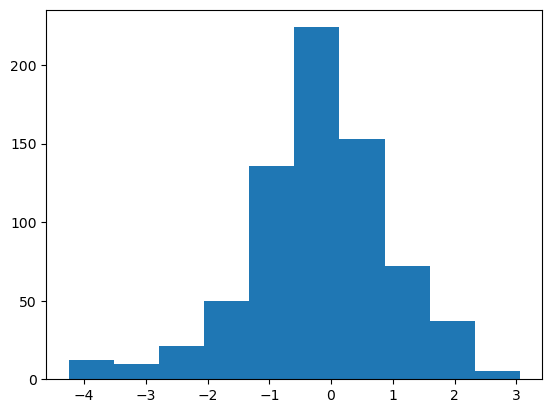

In [10]:
plt.hist(y_test - predictions)

In [11]:
from sklearn import metrics

metrics.mean_absolute_error(y_test, predictions)

0.8757647420567486

In [12]:
metrics.mean_squared_error(y_test, predictions)

1.3854423630669683

In [13]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.1770481566473685

# BOOST

In [14]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X, y)

/Users/mymytre/opt/miniconda3/envs/data-science/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/mymytre/opt/miniconda3/envs/data-science/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [15]:
score = xgbr.score(X, y)
print("Training score: ", score)

Training score:  0.9826622414189272
